In [1]:
import numpy as np
import sympy as sp
import math
import matplotlib.pyplot as plt

x, y, t = sp.symbols('x y t')

In [2]:
def euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation):
    list_x = [x_start]
    list_y = [y_start]
    list_parameter = [t_min]

    parameter = t_min
    plt.plot(x_start, y_start, 'r.')

    num_of_attention = 0
    num_of_complex = 0
    num_of_iteration = 0

    # Calculate the gradient
    gradient_x = sp.diff(family_of_curves, x)
    gradient_y = sp.diff(family_of_curves, y)
    #print(f"Gradient: ({gradient_x}, {gradient_y})")

    while parameter <= t_max:
        # Evaluate the gradient at the current point and time
        grad_x_val = gradient_x.subs({x: x_start, y: y_start, t: parameter})
        grad_y_val = gradient_y.subs({x: x_start, y: y_start, t: parameter})
        #print(f"Gradient: ({grad_x_val}, {grad_y_val})")

        norm = math.sqrt(grad_x_val**2 + grad_y_val**2)
        #print(norm)

        if (orientation == '+'):
            if abs(norm) > eps:
                move_x = -float(grad_y_val)/norm
                move_y = float(grad_x_val)/norm
            else:
                #print("Delenie nulou!")
                num_of_attention += 1
        if (orientation == '-'):
            if abs(norm) > eps:
                move_x = float(grad_y_val)/norm
                move_y = -float(grad_x_val)/norm
            else:
                #print("Delenie nulou!")
                num_of_attention += 1

        #print(f"Tangent: ({move_x}, {move_y})")
        x_new = x_start + h * move_x
        y_new = y_start + h * move_y
        #print(f"New point: ({x_new}, {y_new})")

        list_x.append(x_new)
        list_y.append(y_new)

        x_start = x_new
        y_start = y_new
        plt.plot(x_new, y_new, 'b.')

        # Solving equation for parameter t
        equation = sp.Eq(family_of_curves, 0)
        solutions = []
        solutions = sp.solveset(equation.subs({x: x_new, y: y_new}), t, domain=sp.S.Reals)
        print(solutions)

        if len(solutions) == 2:
            parameter = solutions.args[1]
        elif len(solutions) == 1:
            parameter = solutions.args[0]
        else:
            parameter = parameter
            num_of_complex += 1
 
        list_parameter.append(parameter)
        num_of_iteration += 1

    print("\nEuler's method:")
    print('Počet nulových gradientov: ' + str(num_of_attention))
    print('Počet komplexných koreňov: ' + str(num_of_complex) )
    print('Počet iterácií: ' + str(num_of_iteration))
     

Starting point is (-1.7071067811865475,-0.2928932188134523) and t=-1
EmptySet
{-0.958432667619338, -0.759426467197294}
EmptySet
EmptySet
EmptySet
{-0.691747002671937, -0.463915854927207}
EmptySet
EmptySet
EmptySet
{-0.385883527466917, -0.207611824906089}
EmptySet
EmptySet
EmptySet
{-0.145424903964179, 0.113999209971844}
EmptySet
EmptySet
EmptySet
{0.211674157549141, 0.318760005816372}
EmptySet
EmptySet
{0.377038722079085, 0.576143849557572}
EmptySet
EmptySet
EmptySet
{0.643852625841931, 0.87152653253511}
EmptySet
EmptySet
EmptySet
{0.949489768090493, 1.1280577020989}

Euler's method:
Počet nulových gradientov: 0
Počet komplexných koreňov: 21
Počet iterácií: 29


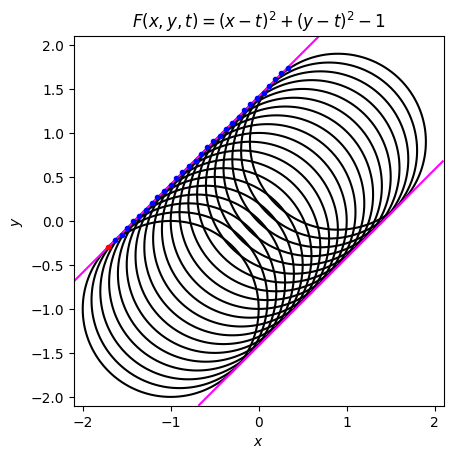

In [5]:
family_of_curves = (x-t)**2 + (y-t)**2  - 1
x_start = -1 - math.sqrt(2)/2
y_start = x_start + math.sqrt(2)
t_min = -1
t_max = 1
h = 0.1
eps = 0.0001
orientation = '-'
print(f"Starting point is ({x_start},{y_start}) and t={t_min}")

axlimx = 2.1
axlimy = 2.1
x_vals = np.linspace(-axlimx, axlimx, 100)
y_vals = np.linspace(-axlimy, axlimy, 100)
X, Y = np.meshgrid(x_vals, y_vals)

for t_vals in np.arange(-1,1,0.1):
    Fxy = (X-t_vals)**2 + (Y-t_vals)**2  - 1
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy1 = Y - X + math.sqrt(2)
Exy2 = Y - X - math.sqrt(2)
plt.contour(X, Y, Exy1, levels=[0], colors='magenta')
plt.contour(X, Y, Exy2, levels=[0], colors='magenta')
plt.gca().set_aspect('equal')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title(r'$F(x, y, t) = (x-t)^2 + (y-t)^2 - 1$')

euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show()


Starting point is (-1,1) and t=-1

Euler's method:
{-0.95}
{-0.9}
{-0.85}
{-0.8}
{-0.75}
{-0.7}
{-0.65}
{-0.6}
{-0.55}
{-0.5}
{-0.45}
{-0.4}
{-0.35}
{-0.3}
{-0.25}
{-0.2}
{-0.15}
{-0.0999999999999997}
{-0.0499999999999997}
{3.19189119579733e-16}
{0.0500000000000003}
{0.1}
{0.15}
{0.2}
{0.25}
{0.3}
{0.35}
{0.4}
{0.45}
{0.5}
{0.55}
{0.6}
{0.65}
{0.700000000000001}
{0.750000000000001}
{0.800000000000001}
{0.850000000000001}
{0.900000000000001}
{0.950000000000001}
{1.0}

Euler's method:
Počet nulových gradientov: 0
Počet komplexných koreňov: 0
Počet iterácií: 40


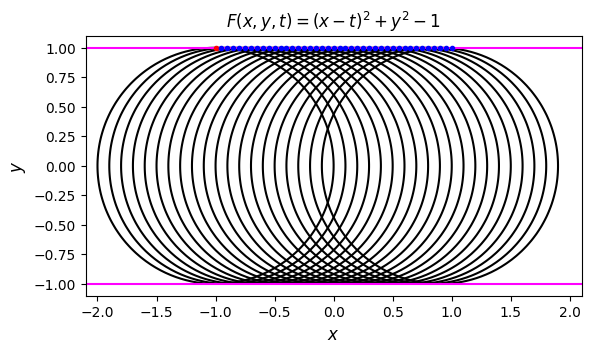

In [7]:
# Define function, initial values, and other parameters
family_of_curves = (x - t)**2 + y**2 - 1
x_start = -1
y_start = 1
t_min = -1
t_max = 1
h = 0.05
eps = 0.0001
orientation = '-'
print(f"Starting point is ({x_start},{y_start}) and t={t_min}")

axlimx = 2.1
axlimy = 1.1
x_vals = np.linspace(-axlimx, axlimx, 100)
y_vals = np.linspace(-axlimy, axlimy, 100)
X, Y = np.meshgrid(x_vals, y_vals)

# Create the contour plot
for t_val in np.arange(-1, 1, 0.1):
    Fxy = (X - t_val)**2 + Y**2 - 1
    plt.contour(X, Y, Fxy, levels=[0], colors='black')

Exy1 = Y - 1
Exy2 = Y + 1
plt.contour(X, Y, Exy1, levels=[0], colors='magenta')
plt.contour(X, Y, Exy2, levels=[0], colors='magenta')

# Add labels and title
plt.xlabel('$x$', fontsize='12')
plt.ylabel('$y$', fontsize='12')
plt.gca().set_aspect('equal')
plt.title(r'$F(x, y, t) = (x-t)^2 + y^2 - 1$', fontsize='12')

print("\nEuler's method:")
euler_method(family_of_curves, x_start, y_start, t_min, t_max, h, eps, orientation)
plt.show()